# STAT 198 Quantitative Finance Final Project
## Data Cleaning
Ming Fong and Alex Yang

In [1]:
# !pip install pytrends

In [2]:
import yfinance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pytrends.request import TrendReq

In [3]:
pytrends = TrendReq(hl = "en-US", tz = 480)
# Up to 5 items in keyword list
kw_list = ["Tesla"]
"""
Categories for cat parameter
https://github.com/pat310/google-trends-api/wiki/Google-Trends-Categories
"""
pytrends.build_payload(kw_list, cat=0, timeframe='all', geo='', gprop='')
trend = pytrends.interest_over_time()

In [4]:
trend

,Tesla,isPartial
date,,
2004-01-01,6,False
2004-02-01,6,False
2004-03-01,7,False
2004-04-01,7,False
2004-05-01,6,False
...,...,...
2020-07-01,80,False
2020-08-01,77,False
2020-09-01,100,False


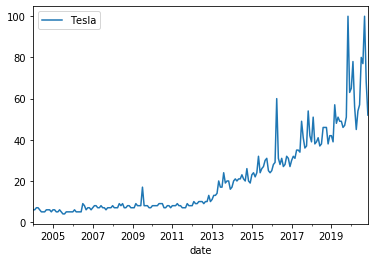

In [5]:
trend.plot()

In [6]:
tsla = yfinance.download("TSLA")
tsla.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


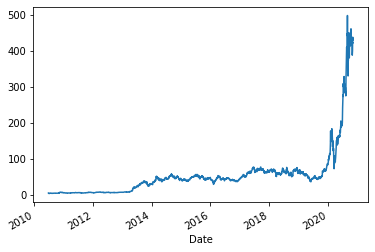

In [7]:
tsla["Adj Close"].plot()

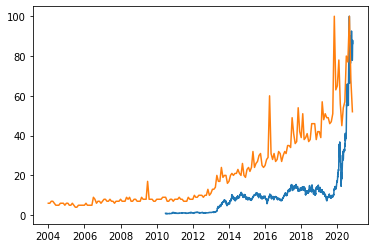

In [8]:
scaled_tsla = tsla["Adj Close"] / tsla["Adj Close"].max() * 100
plt.plot(scaled_tsla)
plt.plot(trend["Tesla"])

In [13]:
hourly_trend = pytrends.get_historical_interest(kw_list, year_start=2020, month_start=8, day_start=1, hour_start=0, year_end=2020, month_end=10, day_end=31, hour_end=23, cat=0, geo='', gprop='', sleep=0)
hourly_trend

The request failed: Google returned a response with code 500.


,Tesla,isPartial
date,,
2020-08-01 00:00:00,83,False
2020-08-01 01:00:00,77,False
2020-08-01 02:00:00,71,False
2020-08-01 03:00:00,66,False
2020-08-01 04:00:00,62,False
...,...,...
2020-10-31 19:00:00,66,False
2020-10-31 20:00:00,68,False
2020-10-31 21:00:00,69,False


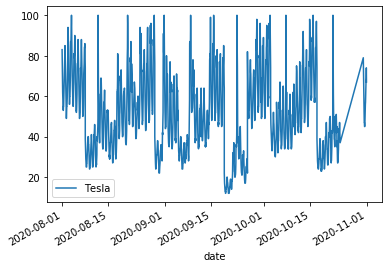

In [14]:
hourly_trend.plot()